In [1]:
import pImpactR as impact
import numpy as np
import matplotlib.pyplot as plt

In [2]:
beam,lattice=impact.readInputFile('test.in.chad')
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency
beam.nCore_y = 1
beam.nCore_z = 1
beam.mesh.fld_solver = 'Smooth_Focusing'

reading ImpactZ input file (test.in.chad)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [3]:
q_m = beam.multi_charge.q_m[0]
pTest = []
for ix in range(1,100):
    pTest.append([ix*0.0002,0.0,0.0,0.0,0.0,0.0,q_m,0.0,ix])
pTest = np.array(pTest)
impact.writeParticleData(pTest,ke,mass,freq)
beam.n_particles = len(pTest)

In [4]:
lattice[0].turns = 2000

TBT=impact.getElem('TBT')
TBT.file_id = 1000
lattice[1] = TBT

lattice[2].length = 0.05 # (meter)
lattice[2].n_sckick = int(100/1.8*0.05)+1
lattice[2].n_map = 2
lattice[2].pipe_radius = 0.1

lattice.pop();

In [5]:
lattice[2]


             length: 0.05 [m]
           n_sckick: 3 [1]
              n_map: 2 [1]
         strength_t: 0.4
 transverse_scale_c: 0.01
        pipe_radius: 0.1 [m]
               betx: 1.2732395447351628 [m]
               type: 'nonlinear_insert_smooth_focusing'

In [6]:
2000*0.05

100.0

In [7]:
impact.writeInputFile(beam,lattice)
impact.run(beam)

0

In [8]:
iTBT,TBT=impact.readTBT(1000,ke,mass,freq)
print(iTBT)
print(TBT[0,0,:])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56]
[0.0002 0.0004 0.0006 0.0008 0.001  0.0012 0.0014 0.0016 0.0018 0.002
 0.0022 0.0024 0.0026 0.0028 0.003  0.0032 0.0034 0.0036 0.0038 0.004
 0.0042 0.0044 0.0046 0.0048 0.005  0.0052 0.0054 0.0056 0.0058 0.006
 0.0062 0.0064 0.0066 0.0068 0.007  0.0072 0.0074 0.0076 0.0078 0.008
 0.0082 0.0084 0.0086 0.0088 0.009  0.0092 0.0094 0.0096 0.0098 0.01
 0.0102 0.0104 0.0106 0.0108 0.011  0.0112]


In [9]:
NL_c    = lattice[2].transverse_scale_c
NL_betx = lattice[2].betx

In [10]:
TBT[:,0,:] = TBT[:,0,:]/np.sqrt(NL_betx)/NL_c
TBT[:,1,:] = TBT[:,1,:]*np.sqrt(NL_betx)/NL_c
TBT[:,2,:] = TBT[:,2,:]/np.sqrt(NL_betx)/NL_c
TBT[:,3,:] = TBT[:,3,:]*np.sqrt(NL_betx)/NL_c
print(TBT[0,0,:])

[0.01772454 0.03544908 0.05317361 0.07089815 0.08862269 0.10634723
 0.12407177 0.1417963  0.15952084 0.17724538 0.19496992 0.21269446
 0.23041899 0.24814353 0.26586807 0.28359261 0.30131715 0.31904168
 0.33676622 0.35449076 0.3722153  0.38993984 0.40766437 0.42538891
 0.44311345 0.46083799 0.47856253 0.49628706 0.5140116  0.53173614
 0.54946068 0.56718522 0.58490975 0.60263429 0.62035883 0.63808337
 0.65580791 0.67353244 0.69125698 0.70898152 0.72670606 0.7444306
 0.76215513 0.77987967 0.79760421 0.81532875 0.83305329 0.85077782
 0.86850236 0.8862269  0.90395144 0.92167598 0.93940051 0.95712505
 0.97484959 0.99257413]


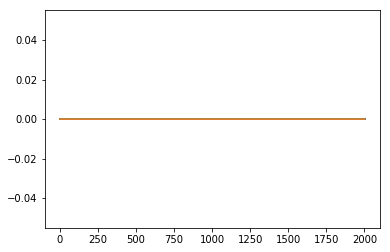

In [11]:
for i in range(len(iTBT)):
    plt.plot(TBT[:,2,i]);
    plt.plot(TBT[:,3,i]);

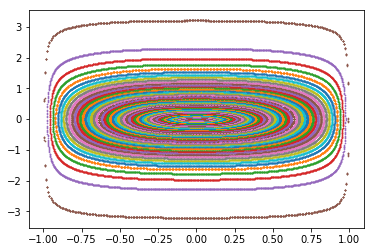

In [12]:
for i in range(len(iTBT)):
    plt.scatter(TBT[:,0,i],TBT[:,1,i],s=0.4)

for i in range(40,len(iTBT)):
    plt.scatter(TBT[:,0,i],TBT[:,1,i],s=0.4)